In [1]:
# Vamos a programar:
import numpy as np
%pylab inline
# Debemos de tener nuestra funcion s para minimizar la accion.

import numpy as np
import scipy.optimize 
import pandas as pd
import matplotlib.pyplot as plt
global g  
g=9.8 # Gravedad de la tierra
tini=0 #[s]
tend=3 #[s]
xini=0 #[m]
xend=0
x=np.array([xini,10,15.,22.,18.,5.,xend])





Populating the interactive namespace from numpy and matplotlib


In [2]:
x[:-1]

array([ 0., 10., 15., 22., 18.,  5.])

In [3]:
x[1:]

array([10., 15., 22., 18.,  5.,  0.])

In [4]:
Dx=x[1:]-x[:-1]
print('vector of position differences:', Dx)
Dt=tend/x[:-1].size
print('time difference is constant: ',Dt)

vector of position differences: [ 10.   5.   7.  -4. -13.  -5.]
time difference is constant:  0.5


In [5]:
def S(x,tend=3.,m=0.2,xini=0.,xend=0.):   # Funcion de la ccion, nos devuelve un valor.
    
    x=np.asarray(x)
    Dt=tend/x[:-1].size
    #Fix initial and final point
    x[0]=xini
    x[-1]=xend
    return ( (0.5*m*(x[1:]-x[:-1])**2/Dt**2-0.5*m*g*(x[1:]+x[:-1]) )*Dt).sum()

In [6]:
import scipy.optimize as optimize
from scipy.optimize import minimize

def xfit(n,t=3.,m=0.2,xini=0.,xend=0.,ftol=1E-8):

    
    t=float(t)
    if n%2==0:
        print ( 'x array must be odd')
        sys.exit()
    x0=np.zeros(n)
    a = optimize.fmin_powell(S,x0,args=(t,m,xini,xend),ftol=ftol,full_output=1)    # optimize.fmin_powell(S,x0,args=(t,m,xini,xend),ftol=ftol,full_output=1) 
    x=a[0]
    x[0]=xini;x[-1]=xend
    xmax=np.sort(x)[-1]
    Smin=a[1]
    Dt=t/x[:-1].size #  t/(n-1)
    return x,xmax,Smin,Dt


In [7]:
t=3.0
m=0.2
y=xfit(21,t,m)
x=y[0]
print(x)

xmax=y[1]
Smin=y[2]
Dt=y[3]
tx=np.arange(0,t+Dt,Dt)

Optimization terminated successfully.
         Current function value: -21.554977
         Iterations: 28
         Function evaluations: 5837
[ 0.          2.09485981  3.96927762  5.62312695  7.05635241  8.26906363
  9.26154883 10.03312026 10.58423427 10.91506033 11.02529045 10.91501183
 10.58427987 10.03303519  9.26102159  8.26869546  7.05596305  5.62273064
  3.9689361   2.09464162  0.        ]


In [8]:
# Veamos lo mismo pero con la funcion SLSQP

def xfit1(n,t=3.,m=0.2,xini=0.,xend=0.,ftol=1E-8):

    
    t=float(t)
    if n%2==0:
        print ( 'x array must be odd')
        sys.exit()
    x0=np.zeros(n)
    a = scipy.optimize.minimize(S, x0, args=(t,m,xini,xend))   # ES EL METODO SCIPY.OPTIMIZE (.....)
    x=a.x
    x[0]=xini;x[-1]=xend
    xmax=np.sort(x)[-1]
    Smin=a.fun
    Dt=t/x[:-1].size #  t/(n-1)
    return x,xmax,Smin,Dt
xfit1(21)



(array([ 0.        ,  2.09474984,  3.96900265,  5.62275094,  7.05599941,
         8.26874885,  9.26099858, 10.03274803, 10.58399679, 10.91474915,
        11.02499792, 10.91474708, 10.58399827, 10.03274841,  9.26099744,
         8.26874799,  7.05600062,  5.6227506 ,  3.96899992,  2.09475262,
         0.        ]),
 11.024997924061152,
 -21.554977499968317,
 0.15)

In [9]:
t=3.0
m=0.2
y=xfit1(21,t,m)
x=y[0]
xmax=y[1]
Smin=y[2]
Dt=y[3]
tx1=np.arange(0,t+Dt,Dt)

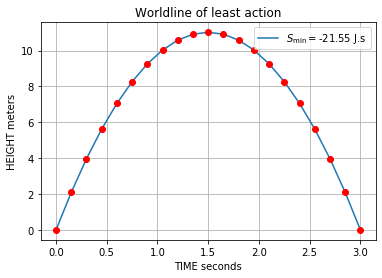

In [10]:
plt.plot(tx1,x,label='$S_{\mathrm{min}}=$%.2f J.s' %Smin)
plt.plot(tx1,x,'ro')
plt.ylabel('HEIGHT meters')
plt.xlabel('TIME seconds')
plt.title('Worldline of least action')
plt.legend(loc='best')
plt.grid()

In [11]:

def xfit2(n,t=3.,m=0.2,xini=0.,xend=0.,ftol=1E-8):

    
    t=float(t)
    if n%2==0:
        print ( 'x array must be odd')
        sys.exit()
    x0=np.zeros(n)
    a = scipy.optimize.minimize(S, x0, args=(), method='SLSQP')        # CON METODO DE "SLSQP"
    x=a.x
    x[0]=xini;x[-1]=xend
    xmax=np.sort(x)[-1]
    Smin=a.fun
    Dt=t/x[:-1].size #  t/(n-1)
    return x,xmax,Smin,Dt
xfit2(21)


(array([ 0.        ,  2.09479625,  3.96899864,  5.62271249,  7.05593218,
         8.26871297,  9.26087282, 10.03259583, 10.58378604, 10.91448475,
        11.02473448, 10.91448467, 10.58378615, 10.03259516,  9.26087246,
         8.26871223,  7.05593341,  5.62271053,  3.96899997,  2.09479527,
         0.        ]),
 11.02473447889917,
 -21.554977470134183,
 0.15)

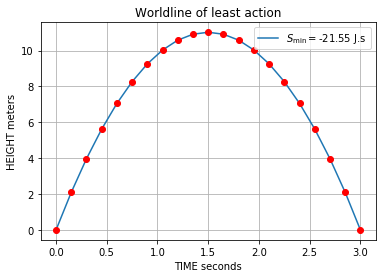

In [12]:
t=3.0
m=0.2
y=xfit2(21,t,m)
x=y[0]
xmax=y[1]
Smin=y[2]
Dt=y[3]
tx3=np.arange(0,t+Dt,Dt)

plt.plot(tx,x,label='$S_{\mathrm{min}}=$%.2f J.s' %Smin)
plt.plot(tx,x,'ro')
plt.ylabel('HEIGHT meters')
plt.xlabel('TIME seconds')
plt.title('Worldline of least action')
plt.legend(loc='best')
plt.grid()



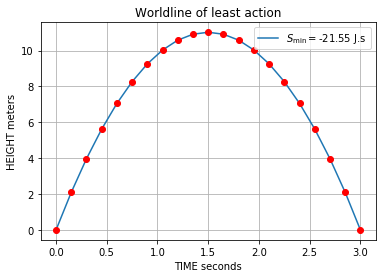

In [13]:
plt.plot(tx,x,label='$S_{\mathrm{min}}=$%.2f J.s' %Smin)  # Para xfit 1.
plt.plot(tx,x,'ro')
plt.ylabel('HEIGHT meters')
plt.xlabel('TIME seconds')
plt.title('Worldline of least action')
plt.legend(loc='best')
plt.grid()